In [35]:
import numpy as np
import h5py
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

data = pd.read_csv('transformed.csv', encoding='latin-1')
data

,Unnamed: 0,order_date,order_day_of_week,order_hour,delivery_status,payment_method,coupon_usage,delivery_fee,food_price,cooking_time_in_seconds,...,is_bkk,is_chain_res,resturant_size,is_main_dish,CASH,LINEMAN_CREDIT_CARD,RLP,L,M,S
0,0,1,Monday,12,COMPLETED,CASH,NO COUPON,10.0,100.0,424.0,...,0,0,S,1,1,0,0,0,0,1
1,1,1,Monday,11,COMPLETED,CASH,COUPON USED,75.0,0.0,NaN,...,1,1,M,1,1,0,0,0,1,0
2,2,1,Monday,9,COMPLETED,CASH,NO COUPON,0.0,130.0,345.0,...,1,0,S,1,1,0,0,0,0,1
3,3,1,Monday,18,COMPLETED,CASH,NO COUPON,20.0,80.0,710.0,...,0,0,S,0,1,0,0,0,0,1
4,4,1,Monday,8,COMPLETED,CASH,NO COUPON,10.0,60.0,659.0,...,0,0,S,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236137,236137,365,Monday,15,COMPLETED,CASH,COUPON USED,137.0,960.0,1464.0,...,1,0,L,1,1,0,0,1,0,0
236138,236138,365,Monday,14,COMPLETED,CASH,COUPON USED,0.0,50.0,207.0,...,1,0,S,0,1,0,0,0,0,1
236139,236139,365,Monday,17,COMPLETED,CASH,COUPON USED,25.0,326.0,926.0,...,0,0,L,1,1,0,0,1,0,0
236140,236140,365,Monday,17,COMPLETED,CASH,COUPON USED,0.0,240.0,709.0,...,1,0,S,1,1,0,0,0,0,1


In [89]:
import matplotlib.style
import matplotlib as mpl
mpl.style.use('seaborn-whitegrid')

In [90]:
completed_orders = data[data['delivery_status'] == 'COMPLETED']
completed_orders['hrs_index'] = completed_orders[['order_date','order_hour']].apply(lambda x: (x.order_date-1)*24 + x.order_hour, axis=1)
completed_orders

/var/folders/2z/gx0h09yd43nb0t7ydmys7xnw0000gn/T/ipykernel_52053/2926394550.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  completed_orders['hrs_index'] = completed_orders[['order_date','order_hour']].apply(lambda x: (x.order_date-1)*24 + x.order_hour, axis=1)


,Unnamed: 0,order_date,order_day_of_week,order_hour,delivery_status,payment_method,coupon_usage,delivery_fee,food_price,cooking_time_in_seconds,...,is_chain_res,resturant_size,is_main_dish,CASH,LINEMAN_CREDIT_CARD,RLP,L,M,S,hrs_index
0,0,1,Monday,12,COMPLETED,CASH,NO COUPON,10.0,100.0,424.0,...,0,S,1,1,0,0,0,0,1,12
1,1,1,Monday,11,COMPLETED,CASH,COUPON USED,75.0,0.0,NaN,...,1,M,1,1,0,0,0,1,0,11
2,2,1,Monday,9,COMPLETED,CASH,NO COUPON,0.0,130.0,345.0,...,0,S,1,1,0,0,0,0,1,9
3,3,1,Monday,18,COMPLETED,CASH,NO COUPON,20.0,80.0,710.0,...,0,S,0,1,0,0,0,0,1,18
4,4,1,Monday,8,COMPLETED,CASH,NO COUPON,10.0,60.0,659.0,...,0,S,1,1,0,0,0,0,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236137,236137,365,Monday,15,COMPLETED,CASH,COUPON USED,137.0,960.0,1464.0,...,0,L,1,1,0,0,1,0,0,8751
236138,236138,365,Monday,14,COMPLETED,CASH,COUPON USED,0.0,50.0,207.0,...,0,S,0,1,0,0,0,0,1,8750
236139,236139,365,Monday,17,COMPLETED,CASH,COUPON USED,25.0,326.0,926.0,...,0,L,1,1,0,0,1,0,0,8753
236140,236140,365,Monday,17,COMPLETED,CASH,COUPON USED,0.0,240.0,709.0,...,0,S,1,1,0,0,0,0,1,8753


In [91]:
agg_dict = {'delivery_status':'count',
            'delivery_fee':'median',
            'restaurant_id':pd.Series.nunique,
            'food_price':'median',
            'is_coupon_used':'sum',
            'is_bkk':'sum',
            'is_chain_res':'sum',
            'is_main_dish':'sum',
            'CASH':'sum',
            'LINEMAN_CREDIT_CARD':'sum',
            'RLP':'sum',
            'L':'sum',
            'M':'sum',
            'S':'sum',
            'cooking_time_in_seconds':'mean',
            'delivery_time_in_seconds':'mean',
            # 'total_time_waiting':'median'
          }

hourly = completed_orders.groupby(['hrs_index','order_hour','order_date','dow'])\
          .agg(agg_dict)\
          .reset_index()\
          .set_index('hrs_index')

hourly.rename(columns={'delivery_status':'orders'}, inplace=True)

In [92]:
median_time = hourly[['order_hour','order_date','delivery_time_in_seconds','cooking_time_in_seconds']]

median_time_fillzero = pd.DataFrame({},index=[i for i in range(1,(24*365)+1)]).reset_index()
median_time_fillzero = pd.merge(median_time_fillzero, median_time, left_on='index', right_on='hrs_index', how='left')
median_time_fillzero['delivery_time_in_seconds'] = median_time_fillzero['delivery_time_in_seconds'].fillna(0)
median_time_fillzero['cooking_time_in_seconds'] = median_time_fillzero['cooking_time_in_seconds'].fillna(0)


# Cut down cooking time by week
cooking_time_hourly = median_time_fillzero[:168*52].cooking_time_in_seconds.values.reshape(-1,168)

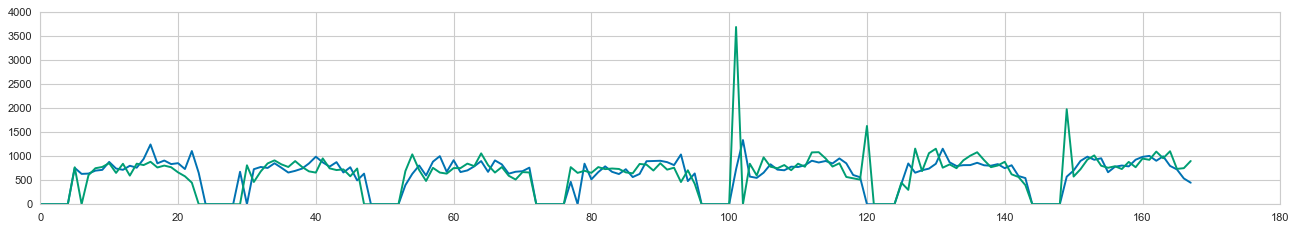

In [93]:
cooking_time_wk6 = cooking_time_hourly[6]
cooking_time_wk7 = cooking_time_hourly[7]

plt.figure(figsize=(20, 3))
plt.plot(cooking_time_wk6)
plt.plot(cooking_time_wk7)

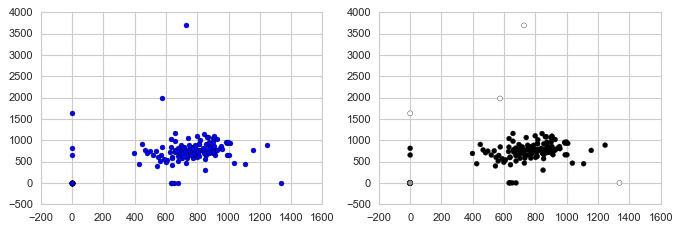

In [107]:
clustering = DBSCAN(eps=400, min_samples=2).fit(np.asarray([cooking_time_wk6,cooking_time_wk7]).T)
plt.figure(figsize=(10, 3))
plt.subplot(121).scatter(cooking_time_wk6,cooking_time_wk7)
plt.subplot(122).scatter(cooking_time_wk6,cooking_time_wk7,c=clustering.labels_)

In [108]:
clustering.labels_

array([ 0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  0,  0,  0,
        0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  0,  0,  0,  0,  0, -1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  0,  0,  0,  0,  0, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

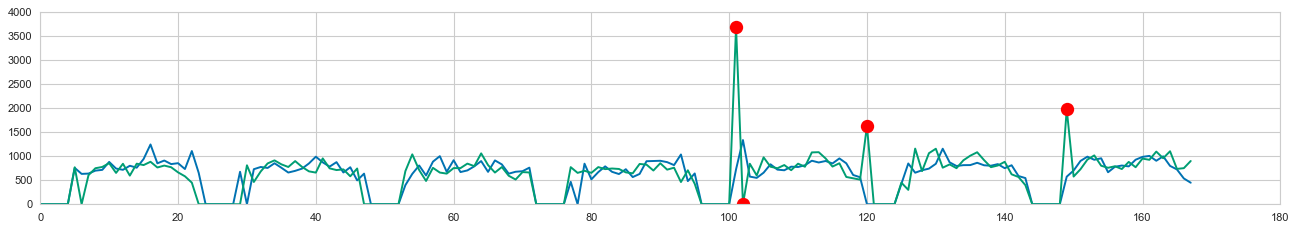

In [112]:
plt.figure(figsize=(20, 3))
plt.plot(cooking_time_wk6)
plt.plot(cooking_time_wk7)

for  i in range(len(clustering.labels_)):
  if clustering.labels_[i] == -1:
    # plt.plot([i,i],[1.5,2.6],'r-')
    plt.plot(i, cooking_time_wk7[i], color='red', marker='o', linewidth=2, markersize=12)